In [0]:
import zipfile
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms

In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/deepweedsx.zip'
with zipfile.ZipFile(train_path, 'r') as zip:
    zip.extractall()

In [0]:
#For converting the dataset to torchvision dataset format
class DatasetLoader(Dataset):
    def __init__(self, file_path,label_path,train=True,transform=None):
        self.transform = transform
        self.file_path=file_path
        self.train=train
        self.label_path = label_path
        
        #self.data_info = pd.read_csv("/content/trainset.csv")
        self.data_info = pd.read_csv(self.label_path)

        self.data_info = self.data_info.sort_values(by = ['Label'])
        self.data_info = self.data_info.reset_index()

        #print(self.data_info)
        #self.data_info = self.data_info.drop('index', axis =1, inplace=True)
        
        self.file_names = [file for _,_,files in os.walk(self.file_path) for file in files]
        self.file_names = sorted(self.file_names)
        self.file_names = np.array(self.file_names)
        self.file_names = self.file_names[:17508]
        

        
        self.len = len(self.file_names)
        
        
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self,  index):
        file_name = self.file_names[index]
        image_data = self.pil_loader(self.file_path +"/" + file_name)
        if self.transform:
            image_data = self.transform(image_data)
        if self.train:
            Y1 = self.get_classes(index)
            label = Y1
            return image_data, label
            
            

    
    
    def pil_loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            image_data = img.convert('RGB')
            return image_data
    
    def get_classes(self, index):
        classs = self.data_info['Species'][index]
        #print(classs)
        return classs
    

In [0]:
mean = np.array([0.485, 0.456, 0.405])
std = np.array([0.229, 0.224, 0.225])


In [0]:
transform = transforms.Compose([
                            transforms.RandomResizedCrop(224),
                            transforms.RandomHorizontalFlip(),
                            transforms.ToTensor(),
                            transforms.Normalize(mean = mean , std =std)
    
                           # mean and std in 3 channels with mean and std of 0.5 an 0.5
])



In [0]:

full_data = DatasetLoader("/content/deepweeds_images_256","/content/df.csv", train=True,transform= transform)
train_size = int(0.7 * len(full_data))
valid_size = len(full_data) - train_size
valid_size = int(0.6*valid_size)
test_size = len(full_data) -train_size- valid_size


train_data, validation_data, test_data = random_split(full_data, [train_size, valid_size, test_size])


train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)


In [0]:

class_names = ['Chinee Apple','Lantana' ,'Parkinsonia' ,'Parthenium',
               'Prickly Acacia', 'Rubber Vine', 'Siam Weed','Snake Weed','Other']

In [35]:


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])



NameError: ignored

In [0]:
dataloaders ={
    'train':train_loader,
    'valid':validation_loader,
    'test':test_loader
}

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 9)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [76]:
n_epochs = 10

valid_loss_min = np.Inf 

for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    valid_loss = 0.0
  
    model_ft.train()
    for data, target in train_loader:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer_ft.zero_grad()
        output = model_ft(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_ft.step()
        train_loss += loss.item()*data.size(0)
        
  
    model_ft.eval()
    for data, target in validation_loader:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = model_ft(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
    
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(validation_loader.sampler)
        
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    if valid_loss <= valid_loss_min:
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.490994 	Validation Loss: 0.445480
Epoch: 2 	Training Loss: 0.418640 	Validation Loss: 0.414455
Epoch: 3 	Training Loss: 0.363513 	Validation Loss: 0.353144
Epoch: 4 	Training Loss: 0.342509 	Validation Loss: 0.332196
Epoch: 5 	Training Loss: 0.314120 	Validation Loss: 0.321273
Epoch: 6 	Training Loss: 0.294071 	Validation Loss: 0.294275
Epoch: 7 	Training Loss: 0.272550 	Validation Loss: 0.288313
Epoch: 8 	Training Loss: 0.253094 	Validation Loss: 0.295937
Epoch: 9 	Training Loss: 0.244359 	Validation Loss: 0.284674
Epoch: 10 	Training Loss: 0.234382 	Validation Loss: 0.253561


In [0]:
checkpoint = {'model': model_ft,
          'state_dict': model_ft.state_dict(),
          'optimizer' : optimizer_ft.state_dict()}

torch.save(checkpoint, 'checkpoint(1).pth')

In [0]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

model = load_checkpoint('checkpoint(1).pth')

In [81]:
def evaluation(dataloader, model_c):
  total,v = 0,0
    

  for data in dataloader:
    inputs, labels = data
    #inputs, labels = inputs.to(device), labels.to(device)
    model_cpu = model_c.to("cpu")
    prediction = model_cpu(inputs)
    _, pred= torch.max(prediction, axis =1)

    total += labels.size(0)
    v += (pred==labels).sum().item()
    print(v)


  print('Test Accuracy: ',(v/total)*100, '%')

evaluation(test_loader,model)

59
121
181
238
298
358
412
470
530
589
647
708
768
824
884
942
999
1056
1110
1173
1233
1293
1351
1407
1467
1524
1581
1637
1694
1754
1814
1873
1921
Test Accuracy:  91.38915318744053 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(8)


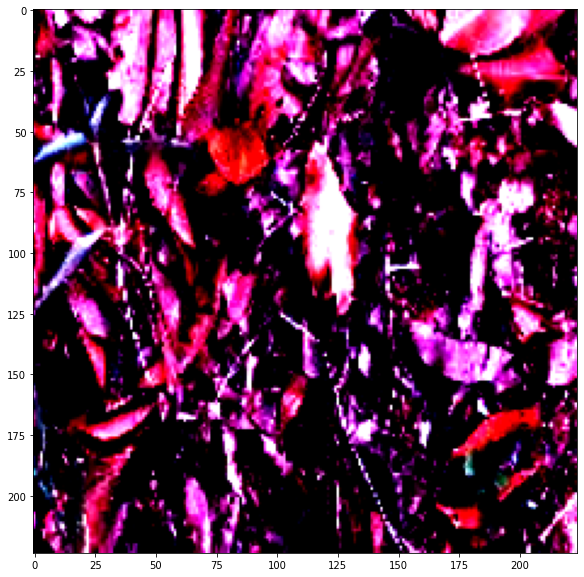

In [30]:
def get_image(loader):
  images, labels = next(iter(loader))
  index = np.random.randint(len(labels))
  return images[index], labels[index], images, labels, index

def show_image(image, label):    
  img = image
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1,2,0))
  plt.figure(figsize = (12,10))

  plt.imshow(npimg)
  print(label)

image, label,images, labels, index = get_image(test_loader)
show_image(image,label)

In [31]:
model.to("cpu")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
def predict(images, labels, index):
  indices, predicted = torch.max(model(images), 1)
  if (predicted[index].item()) == 0:
    print("Predicted Class: Chinee Apple")

  elif(predicted[index].item() == 1):
    print("Predicted Class: 'Lantana' ")
  elif(predicted[index].item() == 2):
    print("Predicted Class: 'Parkinsonia' " )
  elif(predicted[index].item() == 3):
    print("Predicted Class: 'Parthenium' ")
  elif(predicted[index].item() == 4):
    print("Predicted Class: 'Prickly Acacia' ")
  elif(predicted[index].item() == 5):
    print("Predicted Class: 'Rubber Vine' ")
  elif(predicted[index].item() == 6):
    print("Predicted Class: 'Siam Weed" )
  elif(predicted[index].item() == 7):
    print("Predicted Class: 'Snake Weed' ")
  elif(predicted[index].item() == 8):
    print("Predicted Class: 'Siam Weed' ")

  print("Actual Class:", labels[index].item())


    


predict(images, labels, index)

Predicted Class: 'Siam Weed' 
Actual Class: 8


In [16]:
class_names

['Chinee Apple',
 'Lantana',
 'Parkinsonia',
 'Parthenium',
 'Prickly Acacia',
 'Rubber Vine',
 'Siam Weed',
 'Snake Weed',
 'Other']

In [17]:
len(class_names)

9